In [298]:
from graph_tool.all import *
from tqdm import tqdm
import graph_tool.clustering as gtc
import graph_tool.stats as gt
import graph_tool.collection as grtc
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
g = load_graph("../data/graph-tool/allCelltypeGraph.gt")

In [3]:
# create grpah file for cosmograph

g_file = open("../data/graph-tool/remnet.csv", "w")
g_file.write("source, target\n")
for e in tqdm(g.edges()):
    g_file.write(f"{g.vp.name[e.source()]}, {g.vp.name[e.target()]}\n")
g_file.close()

2404861it [00:08, 284194.85it/s]


In [143]:
# set graph to undirected
g.set_directed(False)
g.is_directed()

False

In [329]:
# get component labels
comp, hist = label_components(g)

In [402]:
# print general info of components
print(min(hist))
print(max(hist))
print(most_frequent(list(hist)))
print(list(hist).count(55))
print(len(set(comp)))
print(len(set(hist)))

2
16500
55
134
2188
1055


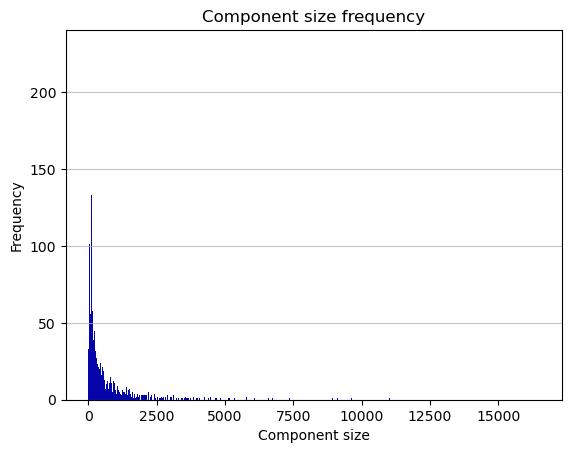

In [501]:
# component size frequency plot
plt.hist(list(hist), bins = 980,  color='#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Component size')
plt.ylabel('Frequency')
plt.title('Component size frequency')
plt.savefig("../data/figures/comp_size_freq.png")

In [33]:
# average degree for all nodes
gt.vertex_average(g, "total")

(3.121167345121775, 0.008837239410332558)

In [51]:
# number of genes, rems and av. rem and gene degrees and list of rems and genes with maximum degree
gen_count = 0
gend_count = 0
gend_list = []
maxgd = 0
gdlist = []
rem_count = 0
remd_count = 0
maxrd = 0
rdlist = []
crem_count = 0
cremd_count = 0
cremd_list = []
for v in g.vertices():
    degree = g.get_total_degrees([v])[0]
    if g.vp.name[v].startswith("E"):
        gend_list.append(degree)
        gen_count += 1
        gend_count += degree
        if degree == 108:
            gdlist.append(g.vp.name[v])
        if degree > maxgd:
            maxgd = degree
    else:
        rem_count += 1
        remd_count += degree
        if degree == 122:
            rdlist.append(g.vp.name[v])
        if degree > maxrd:
            maxrd = degree
        if g.vp.name[v].startswith("C"):
            cremd_list.append(degree)
            crem_count += 1
            cremd_count += degree

av_gend = gend_count / gen_count
av_remd = remd_count / rem_count
av_cremd = cremd_count / crem_count

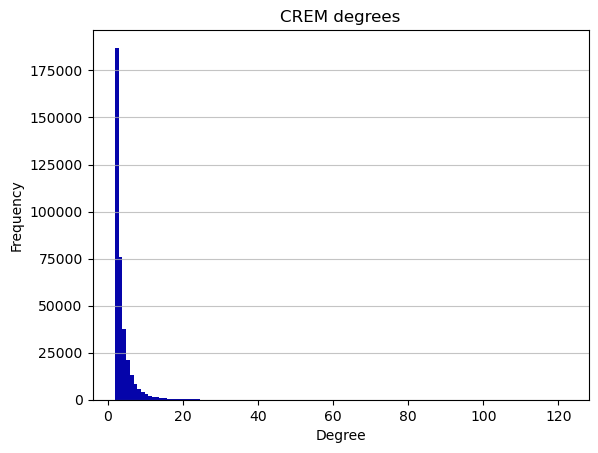

In [68]:
# plot degrees for CREMs
plt.hist(cremd_list, bins=122, color='#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('CREM degrees')
# plt.show()
plt.savefig("../data/figures/crem_degree.jpg")

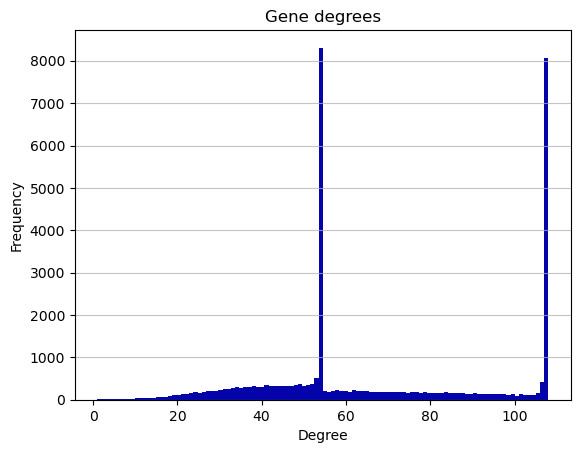

In [69]:
# plot degrees for genes
plt.hist(gend_list, bins=108, color='#0504aa')
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Gene degrees')
# plt.show()
plt.savefig("../data/figures/gene_degree.jpg")

In [46]:
# print general statistics
print(maxgd)
print(gdlist[0])
print(len(gdlist))
print(maxrd)
print(rdlist)
print(av_gend)
print(av_remd)
print(av_cremd)

108
ENSG00000237491
8069
122
['CREM0109128']
67.97425026145453
1.5972541580821746
3.461739568447737
